In [19]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
from scipy.stats import binned_statistic_2d
import matplotlib.pyplot as plt
import matplotlib.colors as colors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
ps = pd.read_csv('../data/era5_omega_pcs/merged.global.pcs.csv')
exps = ps[ps['max_precip']>=60]

sigma_pc1 = ps['pc1'].std()
sigma_pc2 = ps['pc2'].std()

/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_18043/3551007770.py:53: RuntimeWarning: divide by zero encountered in divide
  pdf = excounts/allcount
/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_18043/3551007770.py:53: RuntimeWarning: invalid value encountered in divide
  pdf = excounts/allcount


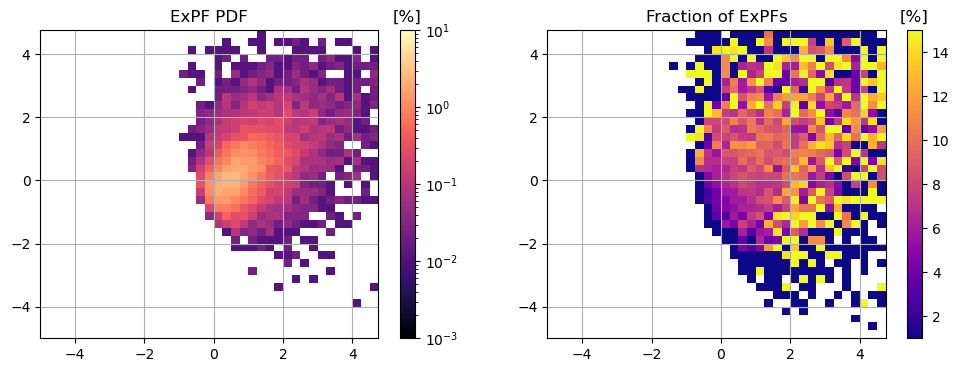

In [64]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

ax = axs[0]
pc1 = exps['pc1']/sigma_pc1
pc2 = exps['pc2']/sigma_pc2

bins = np.arange(-5, 5, 0.25)
excounts = binned_statistic_2d(
    pc2, 
    pc1, 
    values=None, 
    bins=bins, 
    statistic='count'
).statistic

pdf = excounts/excounts.sum()
x_mesh, y_mesh = np.meshgrid(bins, bins)

c = ax.pcolormesh(
    x_mesh, 
    y_mesh, 
    100*pdf, 
    cmap=plt.cm.magma, 
    norm=colors.LogNorm(vmin=1e-3, vmax=1e1)
)

cb = plt.colorbar(c)
cb.ax.set_title('[%]')
ax.set_title('ExPF PDF')
ax.grid()

ax = axs[1]
pc1 = exps['pc1']/sigma_pc1
pc2 = exps['pc2']/sigma_pc2

bins = np.arange(-5, 5, 0.25)
excounts = binned_statistic_2d(
    pc2, 
    pc1, 
    values=None, 
    bins=bins, 
    statistic='count'
).statistic

allcount = binned_statistic_2d(
    ps['pc2']/sigma_y, 
    ps['pc1']/sigma_x, 
    values=None, 
    bins=bins, 
    statistic='count'
).statistic

pdf = excounts/allcount

x_mesh, y_mesh = np.meshgrid(bins, bins)

c = ax.pcolormesh(
    x_mesh, 
    y_mesh, 
    100*pdf, 
    cmap=plt.cm.plasma, 
    norm=colors.Normalize(vmin=1, vmax=15)
)
ax.set_title('Fraction of ExPFs')
cb = plt.colorbar(c)
cb.ax.set_title('[%]')
ax.grid()

Text(0.5, 1.0, 'Extreme Preciptation Features')

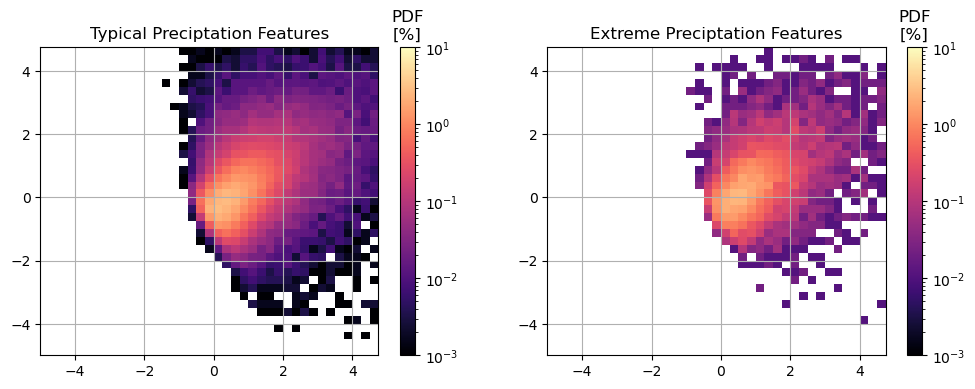

In [53]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
for ax, data in zip(axs.ravel(), [ps, exps]):
    pc1 = data['pc1']/sigma_pc1
    pc2 = data['pc2']/sigma_pc2


    bins = np.arange(-5, 5, 0.25)

    pdf = binned_statistic_2d(
        pc2, 
        pc1, 
        values=None, 
        bins=bins, 
        statistic='count'
    ).statistic

    pdf /= pdf.sum()

    x_mesh, y_mesh = np.meshgrid(bins, bins)

    c = ax.pcolormesh(
        x_mesh, 
        y_mesh, 
        100*pdf, 
        cmap=plt.cm.magma, 
        norm=colors.LogNorm(vmin=1e-3, vmax=1e1)
    )

    cb = plt.colorbar(c)
    cb.ax.set_title('PDF\n[%]')
    ax.grid()

axs[0].set_title('Typical Preciptation Features')
axs[1].set_title('Extreme Preciptation Features')


Text(0.5, 1.0, 'Extreme Preciptation Features')

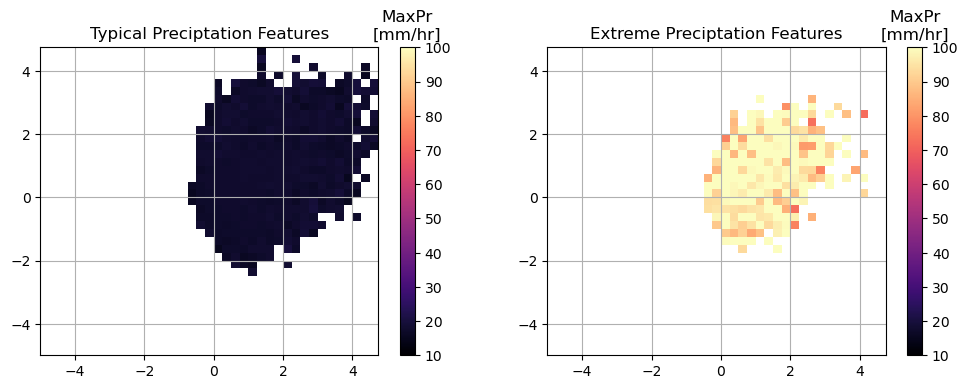

In [74]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
for ax, data in zip(axs.ravel(), [typs, exps]):
    pc1 = data['pc1']/sigma_pc1
    pc2 = data['pc2']/sigma_pc2

    stat_to_color = data['max_precip']


    bins = np.arange(-5, 5, 0.25)

    stat = binned_statistic_2d(
        pc2, 
        pc1, 
        values=stat_to_color, 
        bins=bins, 
        statistic=lambda x: np.nanmean(x) if x.size > 5 else np.nan
    ).statistic

    x_mesh, y_mesh = np.meshgrid(bins, bins)

    c = ax.pcolormesh(
        x_mesh, 
        y_mesh, 
        stat, 
        cmap=plt.cm.magma, 
        norm=colors.Normalize(vmin=10, vmax=100)
    )

    cb = plt.colorbar(c)
    cb.ax.set_title('MaxPr\n[mm/hr]')
    ax.grid()

axs[0].set_title('Typical Preciptation Features')
axs[1].set_title('Extreme Preciptation Features')


Text(0.5, 1.0, 'Extreme Preciptation Features')

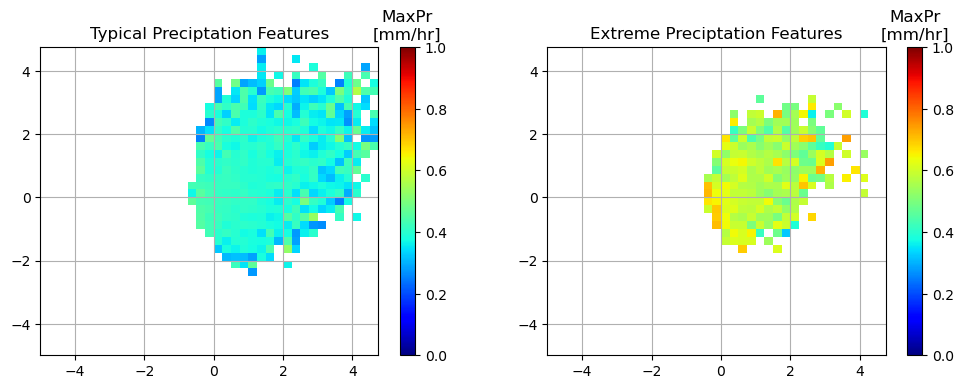

In [81]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
for ax, data in zip(axs.ravel(), [typs, exps]):
    pc1 = data['pc1']/sigma_pc1
    pc2 = data['pc2']/sigma_pc2

    stat_to_color = data['largest_10mmhr_cluster_precip_8conn']/data['total_precip']


    bins = np.arange(-5, 5, 0.25)

    stat = binned_statistic_2d(
        pc2, 
        pc1, 
        values=stat_to_color, 
        bins=bins, 
        statistic=lambda x: np.nanmean(x) if x.size > 5 else np.nan
    ).statistic

    x_mesh, y_mesh = np.meshgrid(bins, bins)

    c = ax.pcolormesh(
        x_mesh, 
        y_mesh, 
        stat, 
        cmap=plt.cm.jet, 
        norm=colors.Normalize(vmin=0, vmax=1)
    )

    cb = plt.colorbar(c)
    cb.ax.set_title('MaxPr\n[mm/hr]')
    ax.grid()

axs[0].set_title('Typical Preciptation Features')
axs[1].set_title('Extreme Preciptation Features')


Text(0.5, 1.0, 'Extreme Preciptation Features')

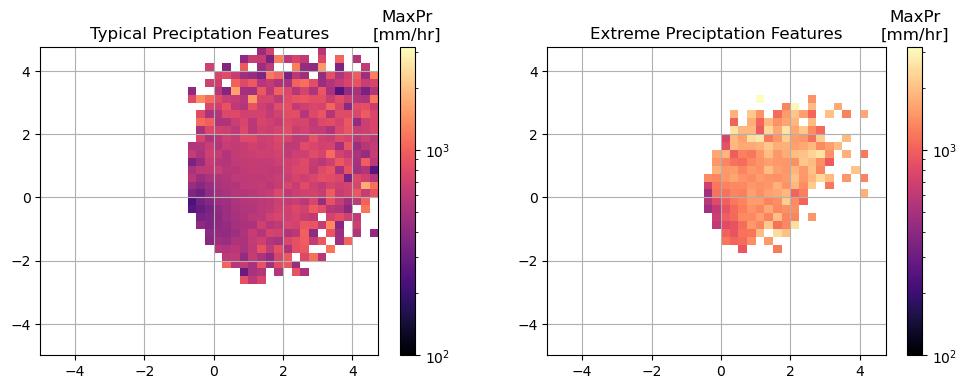

In [80]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
for ax, data in zip(axs.ravel(), [ps, exps]):
    pc1 = data['pc1']/sigma_pc1
    pc2 = data['pc2']/sigma_pc2

    stat_to_color = data['num_pixels'] * 25


    bins = np.arange(-5, 5, 0.25)

    stat = binned_statistic_2d(
        pc2, 
        pc1, 
        values=stat_to_color, 
        bins=bins, 
        statistic=lambda x: np.nanmean(x) if x.size > 5 else np.nan
    ).statistic

    x_mesh, y_mesh = np.meshgrid(bins, bins)

    c = ax.pcolormesh(
        x_mesh, 
        y_mesh, 
        stat, 
        cmap=plt.cm.magma, 
        norm=colors.LogNorm(vmin=1e2, vmax=10**(3.5))
    )

    cb = plt.colorbar(c)
    cb.ax.set_title('MaxPr\n[mm/hr]')
    ax.grid()

axs[0].set_title('Typical Preciptation Features')
axs[1].set_title('Extreme Preciptation Features')
